In [1]:
from circuitClass import *

## Inductively shunted superconducting circuits
In this document, I am trying to use the class circuit to find the eigen energies of the Hamiltonain.
<img src="pic/pic1a.png" style="height:200px">

The parameters that <em> Quantization of inductively shunted superconducting circuits</em> used is:

<img src="pic/pic2.png" style="height:200px">

,and I add $C_x$ a small cappacitance to circuit to diogonalize the Hamiltonian.

In [2]:
# using the parameters that paper defined
lambda1 = 1 - 1.5e-3
lambda2 = 1.5e-2
lambda3 = -5.6e-2
lambda4 = 1 - 1.1e-4
 
S = np.array([[lambda1,lambda2],[lambda3,lambda4]])

Cr = 20.3*fH
Cq = 5.3*fF
Lr = 15.6*nH
Lq = 386*nH
Ls = 4.5*nH

CR = lambda1**2 * Cr + lambda3**2 *Cq 
invLR = lambda1**2/(Lr+Ls) + lambda3**2/Lq - 2*lambda1*lambda3*Ls/Lq/(Lr+Ls)
CQ = lambda2**2 * Cr + lambda4**2 *Cq 
invLQ = lambda2**2/(Lr+Ls) + lambda4**2/Lq - 2*lambda2*lambda4*Ls/Lq/(Lr+Ls)

print("1st resonance frequency:", np.sqrt(invLR/CR)/GHz,'GHz')
print("2nd resonance frequency:" , np.sqrt(invLQ/CQ)/GHz,'GHz')

1st resonance frequency: 7.881613212180042 GHz
2nd resonance frequency: 3.5130205404008183 GHz


## Define the circuit for the Qcircuit 
In this part, I define the input which is necessery for the Hamiltonian.

In [3]:
graph = [[0,1],[0,2],[0,3],[1,2],[2,3]]
L = [0,4.5*nH,0,15.6*nH,386*nH]
# I assumed Cx = 10nF
C = [20.3*fF, 0.0001*fF, 5.3*fF,0,0]
JJ = [0,0,6.2*GHz,0,0]

# define the circuit
cr1 = Qcircuit(graph,L,C,JJ)

# set excitation
phiExt = np.linspace(0,0.5,300)*2*np.pi
cr1.setExcitation([([0,2,1],0),([0,3,2],phiExt)])

cr1.configure()

In [4]:
# fundamental mode frequencies of the circuit:
print("fundamental mode frequencies:",cr1.omega/GHz,"GHz")

fundamental mode frequencies: [8.55471559e+03 7.89173326e+00 3.49731104e+00] GHz


In [8]:
cr1.setFockNumbers([1,5,21])

In [6]:
cr1.solveCircuit(showLoading=False)

(0, 18)

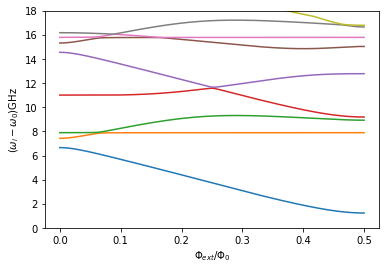

In [7]:
plt.figure()
for i in range(9):
    plt.plot(phiExt/2/np.pi,(cr1.HamilEig[(i+1),:]-cr1.HamilEig[0,:]).real/GHz)
plt.xlabel("$\Phi_{ext}/\Phi_0$")
plt.ylabel("($\omega_i-\omega_0$)GHz")
plt.ylim([0,18])

,and here is the result from the paper 

<img align="left" src="pic/pic1b.png" style="height:250px">

In [12]:
# cr1.saveData('circuit1_DeviceA')

File Saved
